In [407]:
#Preprocessing for neural network or other models - steps
#1 import dependencies 
#bring in data
#look for categorical fields that need to be made numeric
#Look at unique value counts for each field
#determine how to bin
#bin/bucket if needed
#create one_hot encoder instance
#fit the one_hot encoder
#use one hot encoder
#merge new fields back to original dataframe
#drop original fields that are now encoded

In [408]:
#Import dependencies
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from datetime import datetime

#display options
pd.set_option ('display.max_rows', 10)


In [409]:
#Set path of input file
file_path = "Resources/US_Salary_Cleaned.csv"
#Read input file into a DataFrame
salaries_df = pd.read_csv(file_path)
salaries_df

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,Redwood City,CA,USA
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
3,2017-06-17 00:23:00,Apple,Software Engineering Manager,372000,7.0,5.0,157000,180000.0,35000.0,none,...,0,0,0,0,0,0,0,Sunnyvale,CA,USA
4,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,...,0,0,0,0,0,0,0,Mountain View,CA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48106,2018-09-09 11:52:00,Google,Software Engineer,327000,10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
48107,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,0,Redmond,WA,USA
48108,2018-09-13 14:35:00,MSFT,Software Engineer,220000,14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
48109,2018-09-16 16:10:00,Salesforce,Software Engineer,280000,8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA


In [410]:
#inspect data to see which fields are strings that need to be converted to numeric
salaries_df.select_dtypes(include=['object']).columns


Index(['timestamp', 'company', 'title', 'gender', 'city', 'state', 'country'], dtype='object')

In [411]:
#convert timestamp to datetime format
salaries_df['timestamp']=pd.to_datetime(salaries_df['timestamp'])
#display options
pd.set_option ('display.max_rows', 10)
salaries_df


,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,Redwood City,CA,USA
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
3,2017-06-17 00:23:00,Apple,Software Engineering Manager,372000,7.0,5.0,157000,180000.0,35000.0,none,...,0,0,0,0,0,0,0,Sunnyvale,CA,USA
4,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,...,0,0,0,0,0,0,0,Mountain View,CA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48106,2018-09-09 11:52:00,Google,Software Engineer,327000,10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
48107,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,0,Redmond,WA,USA
48108,2018-09-13 14:35:00,MSFT,Software Engineer,220000,14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
48109,2018-09-16 16:10:00,Salesforce,Software Engineer,280000,8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA


In [412]:
# Determine the number of unique values in each column.
pd.set_option ('display.max_rows', None)
salaries_df.nunique()
#Fields that need bucketing: company, title, city, state, country

timestamp                  46816
company                     1445
title                         15
totalyearlycompensation      447
yearsofexperience             63
yearsatcompany                79
basesalary                   414
stockgrantvalue              370
bonus                        145
gender                         4
cityid                       710
dmaid                        148
rowNumber                  48111
Masters_Degree                 2
Bachelors_Degree               2
Doctorate_Degree               2
Highschool                     2
Some_College                   2
Race_Asian                     2
Race_White                     2
Race_Two_Or_More               2
Race_Black                     2
Race_Hispanic                  2
city                         646
state                         49
country                        1
dtype: int64

In [413]:
#Check company field to see how to bucket it
#display options
pd.set_option ('display.max_rows', None)
# Print out the company value counts
company_counts = salaries_df.company.value_counts()
print(company_counts)

Amazon                                     6155
Microsoft                                  4274
Google                                     3325
Facebook                                   2080
Apple                                      1752
Oracle                                      879
Salesforce                                  833
Intel                                       791
Capital One                                 754
Cisco                                       712
IBM                                         689
Uber                                        601
LinkedIn                                    529
VMware                                      523
Qualcomm                                    506
Bloomberg                                   434
JPMorgan Chase                              405
Intuit                                      387
PayPal                                      337
Deloitte                                    332
Twitter                                 

<AxesSubplot:ylabel='Density'>

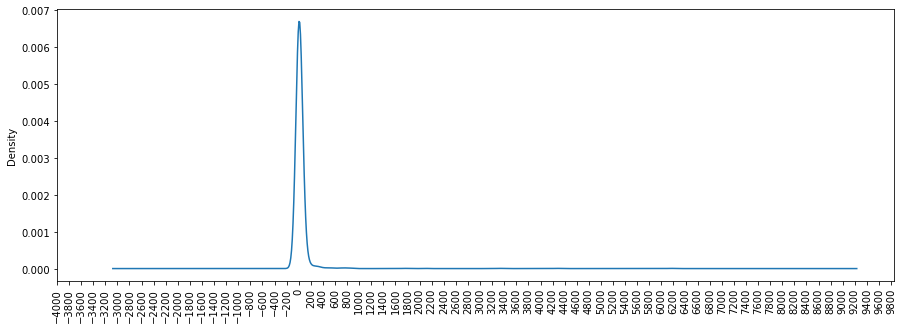

In [414]:
#Visualize the company value counts with a density plot
x_ticks = np.arange(-4000,10000,200)
company_counts.plot.density(xticks=x_ticks, figsize = (15,5), rot = 90)

In [415]:
#Density seems to drop off between 100 and 200 maybe, hard to see
#But this would produce too many buckets
#So bucket all <850 as other

#Determine which values to replace
replace_companies = list(company_counts[company_counts<850].index)

#Replace in DataFrame
for company in replace_companies:
    salaries_df.company = salaries_df.company.replace(company, "Other")

#Check to make sure binning was successful
salaries_df.company.value_counts()

Other        29646
Amazon        6155
Microsoft     4274
Google        3325
Facebook      2080
Apple         1752
Oracle         879
Name: company, dtype: int64

In [416]:
#Check title field to see how to bucket it
#display options
pd.set_option ('display.max_rows', None)
# Print out the company value counts
title_counts = salaries_df.title.value_counts()
print(title_counts)

Software Engineer               31935
Product Manager                  3614
Data Scientist                   2089
Software Engineering Manager     2016
Hardware Engineer                1848
Product Designer                 1276
Technical Program Manager        1140
Solution Architect                785
Management Consultant             761
Business Analyst                  722
Marketing                         589
Mechanical Engineer               448
Recruiter                         400
Human Resources                   292
Sales                             196
Name: title, dtype: int64


<AxesSubplot:ylabel='Density'>

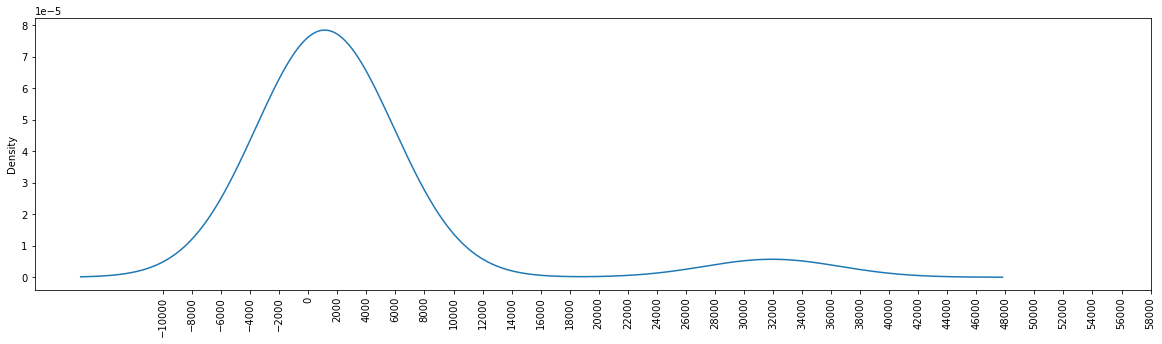

In [417]:
#Visualize the title value counts with a density plot
x_ticks = np.arange(-10000,60000,2000)
title_counts.plot.density(xticks=x_ticks, figsize = (20,5),rot = 90)

In [418]:
#values begine to fall off between 2000 and 4000. Bucket all under 2000

#Determine which values to replace
replace_title = list(title_counts[title_counts<2000].index)

#Replace in DataFrame
for title in replace_title:
    salaries_df.title = salaries_df.title.replace(title, "Other")

#Check to make sure binning was successful
salaries_df.title.value_counts()

Software Engineer               31935
Other                            8457
Product Manager                  3614
Data Scientist                   2089
Software Engineering Manager     2016
Name: title, dtype: int64

In [419]:
#Check city field to see how to bucket it
#display options
pd.set_option ('display.max_rows', None)
# Print out the city value counts
city_counts = salaries_df.city.value_counts()
print(city_counts)

Seattle                    7835
San Francisco              5859
New York                   4036
Redmond                    2492
Sunnyvale                  2009
Mountain View              1992
San Jose                   1875
Austin                     1472
Cupertino                  1302
Boston                     1131
Santa Clara                1127
Menlo Park                 1093
Palo Alto                  1044
San Diego                   810
Chicago                     729
Bellevue                    692
Los Angeles                 653
Washington                  561
Atlanta                     516
Dallas                      457
Redwood City                434
Portland                    330
Denver                      293
Irvine                      245
Pleasanton                  235
Cambridge                   235
Houston                     224
Arlington                   224
Hillsboro                   217
Plano                       209
Minneapolis                 208
Raleigh 

In [420]:
#Check state field to see how to bucket it
#display options
pd.set_option ('display.max_rows', None)
# Print out the city value counts
state_counts = salaries_df.state.value_counts()
print(state_counts)

CA    20190
WA    11264
NY     4188
TX     2614
MA     1663
VA      876
IL      806
OR      605
CO      569
DC      559
GA      555
NC      484
PA      474
NJ      437
AZ      371
FL      295
MN      271
UT      219
MI      213
OH      199
MO      186
WI      155
MD      105
CT      104
IN      100
AR       88
TN       79
DE       58
ID       44
KS       37
NH       35
IA       31
LA       30
NE       25
AL       25
KY       24
NV       23
SC       22
OK       18
RI       18
WV       11
NM       10
VT        7
MT        7
ND        5
ME        4
HI        4
MS        3
WY        1
Name: state, dtype: int64


<AxesSubplot:ylabel='Density'>

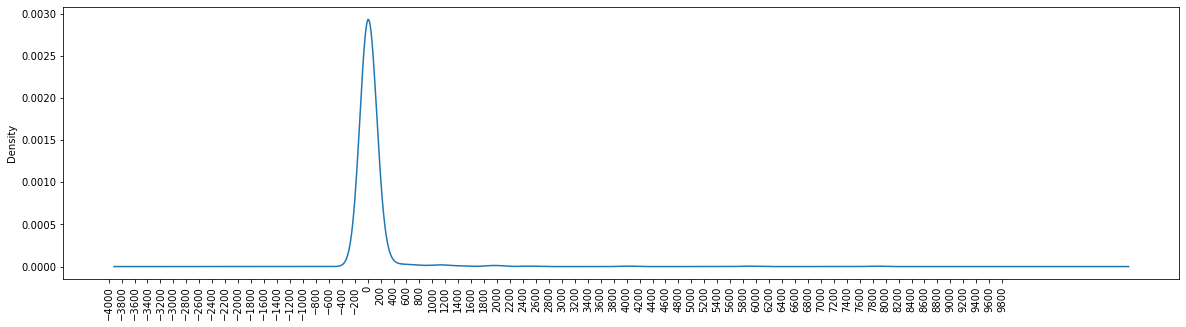

In [421]:
#Visualize the city value counts with a density plot
x_ticks = np.arange(-4000,10000,200)
city_counts.plot.density(xticks=x_ticks, figsize = (20,5), rot = 90)

In [422]:
#I think we should use regional bucketing for our first pass. The 3 location fields just have so many values that north
#doing anything else results in uneven buckets or way too many buckets
#US census bureau defines 9 divisions, which is a good number of buckets
#see this url: https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf
#create regional arrays

salaries_df['region'] = ''

#Create a function to define a region value for each row
def define_region(state):
    new_england = ['ME','CT','NH','VT','RI','MA']
    mid_atlantic = ['NJ','NY','PA']
    east_north_central =['IN','IL','MI','OH','WI']
    west_north_central = ['IA','KS','MN','MO','NE','ND','SD']
    south_atlantic = ['DE','DC','FL','GA','MD','NC','SC','VA','WV']
    east_south_central = ['AL','KY','MS','TN']
    west_south_central = ['AR','LA','OK','TX']
    mountain = ['AZ','CO','ID','NM','MT','UT','NV','WY']
    pacific = ['AK','CA','HI','OR','WA']
    region = ''
    if state in new_england:
        region = 1
    elif state in mid_atlantic:
        region = 2
    elif state in east_north_central:
        region = 3
    elif state in west_north_central:
        region = 4
    elif state in south_atlantic:
        region = 5
    elif state in east_south_central:
        region = 6
    elif state in west_south_central:
        region = 7
    elif state in mountain:
        region = 8
    elif state in pacific:
        region = 9
    else:
        region = 100
        
    return region
    

salaries_df['region'] = salaries_df['state'].apply(define_region)
salaries_df.head()

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country,region
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,Redwood City,CA,USA,9
1,2017-06-10 17:11:00,Other,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,0,0,0,0,0,0,San Francisco,CA,USA,9
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,Seattle,WA,USA,9
3,2017-06-17 00:23:00,Apple,Software Engineering Manager,372000,7.0,5.0,157000,180000.0,35000.0,none,...,0,0,0,0,0,0,Sunnyvale,CA,USA,9
4,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,...,0,0,0,0,0,0,Mountain View,CA,USA,9


In [423]:
salaries_df['region'].value_counts()
#no one went into category 100, so all the rows had valid state values

9    32063
2     5099
5     2965
7     2750
1     1831
3     1473
8     1244
4      555
6      131
Name: region, dtype: int64

In [424]:
#Drop extra location columns prior to one_hot encoding
salaries_df = salaries_df.drop(columns=['city','state','country'])
pd.set_option ('display.max_rows', 10)
salaries_df

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,region
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,0,0,9
1,2017-06-10 17:11:00,Other,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,9
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,9
3,2017-06-17 00:23:00,Apple,Software Engineering Manager,372000,7.0,5.0,157000,180000.0,35000.0,none,...,0,0,0,0,0,0,0,0,0,9
4,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48106,2018-09-09 11:52:00,Google,Software Engineer,327000,10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,0,0,0,9
48107,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,0,0,0,9
48108,2018-09-13 14:35:00,Other,Software Engineer,220000,14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,0,0,0,9
48109,2018-09-16 16:10:00,Other,Software Engineer,280000,8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,0,0,0,9


In [425]:
salaries_df['basesalary'].describe().apply(lambda x: format(x, '.2f'))

count      48111.00
mean      149172.23
std        44381.69
min        10000.00
25%       120000.00
50%       145000.00
75%       170000.00
max      1659870.00
Name: basesalary, dtype: object

In [426]:
#create a target value from the base salary by bucketing
#Mean plus two standard deviations would be 149172 + 44382 + 44382 = 237936
#Make salary bands of 25000 
#Create a function to calculate salary level and apply to column
def salary_buckets(salary):
    max_level_threshold = 350000
    band_size = 25000
    max_bucket = int(max_level_threshold/band_size)
    if salary < max_level_threshold:
        salary_level = int(salary / band_size)
    else:
        salary_level = max_bucket
    return salary_level

In [427]:
salaries_df['salary_level'] = salaries_df['basesalary'].apply(salary_buckets)
salaries_df.head()

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,region,salary_level
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,0,9,4
1,2017-06-10 17:11:00,Other,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,0,0,0,0,0,0,0,0,9,4
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,0,9,6
3,2017-06-17 00:23:00,Apple,Software Engineering Manager,372000,7.0,5.0,157000,180000.0,35000.0,none,...,0,0,0,0,0,0,0,0,9,6
4,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,...,0,0,0,0,0,0,0,0,9,6


In [428]:
pd.set_option ('display.max_rows', 20)
print(salaries_df['salary_level'].value_counts())

5     12120
6     11910
4      8836
7      6239
3      3261
8      3181
2       763
9       758
10      331
14      319
12      143
11      106
1        62
13       58
0        24
Name: salary_level, dtype: int64


In [429]:

salaries_df['salary_level'].value_counts()

5     12120
6     11910
4      8836
7      6239
3      3261
8      3181
2       763
9       758
10      331
14      319
12      143
11      106
1        62
13       58
0        24
Name: salary_level, dtype: int64

array([[<AxesSubplot:title={'center':'salary_level'}>]], dtype=object)

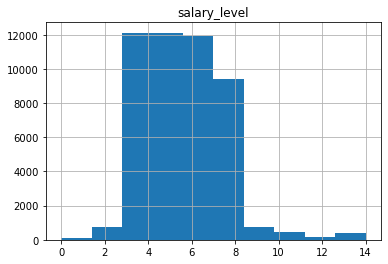

In [430]:
#Look at the distribution of salary level
salaries_df.hist(column = ["salary_level"])

In [332]:
# Generate our categorical variable lists
salaries_cat = salaries_df.dtypes[salaries_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
salaries_df[salaries_cat].nunique()

company    7
title      5
gender     4
dtype: int64

In [333]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(salaries_df[salaries_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(salaries_cat)
encode_df.head()

C:\Users\mgsri\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,company_Amazon,company_Apple,company_Facebook,company_Google,company_Microsoft,company_Oracle,company_Other,title_Data Scientist,title_Other,title_Product Manager,title_Software Engineer,title_Software Engineering Manager,gender_Female,gender_Male,gender_Other,gender_none
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [334]:
# Merge one-hot encoded features and drop the originals
salaries_df = salaries_df.merge(encode_df,left_index=True, right_index=True)
salaries_df = salaries_df.drop(salaries_cat,1)
salaries_df.head()

C:\Users\mgsri\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,timestamp,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,...,company_Other,title_Data Scientist,title_Other,title_Product Manager,title_Software Engineer,title_Software Engineering Manager,gender_Female,gender_Male,gender_Other,gender_none
0,2017-06-07 11:33:00,127000,1.5,1.5,107000,20000.0,10000.0,7392,807.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2017-06-10 17:11:00,100000,5.0,3.0,100000,0.0,0.0,7419,807.0,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2017-06-11 14:53:00,310000,8.0,0.0,155000,0.0,0.0,11527,819.0,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2017-06-17 00:23:00,372000,7.0,5.0,157000,180000.0,35000.0,7472,807.0,7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2017-06-20 10:58:00,157000,5.0,3.0,157000,0.0,0.0,7322,807.0,9,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
